In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD, Adam
from CoinbaseData import CoinbaseDataCollector

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-12-08 20:11:40.743491: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
cb_collector = CoinbaseDataCollector()

In [3]:
btc = cb_collector.get_historical_prices('BTC-USD', 60)
eth = cb_collector.get_historical_prices('ETH-USD', 60)
arb = cb_collector.get_historical_prices('ARB-USD', 60)
ltc = cb_collector.get_historical_prices('LTC-USD', 60)
sol = cb_collector.get_historical_prices('SOL-USD', 60)
avax = cb_collector.get_historical_prices('AVAX-USD', 60)
ada = cb_collector.get_historical_prices('ADA-USD', 60)
link = cb_collector.get_historical_prices('LINK-USD', 60)
stx = cb_collector.get_historical_prices('STX-USD', 60)
doge = cb_collector.get_historical_prices('DOGE-USD', 60)
xlm = cb_collector.get_historical_prices('XLM-USD', 60)
matic = cb_collector.get_historical_prices('MATIC-USD', 60)

Fetching minute data from 2023-12-08 15:11:57.595573 to 2023-12-08 20:11:57.595588
Fetching minute data from 2023-12-08 10:11:57.595573 to 2023-12-08 15:11:57.595573
Fetching minute data from 2023-12-08 05:11:57.595573 to 2023-12-08 10:11:57.595573
Fetching minute data from 2023-12-08 00:11:57.595573 to 2023-12-08 05:11:57.595573
Fetching minute data from 2023-12-07 19:11:57.595573 to 2023-12-08 00:11:57.595573
Fetching minute data from 2023-12-07 14:11:57.595573 to 2023-12-07 19:11:57.595573
Fetching minute data from 2023-12-07 09:11:57.595573 to 2023-12-07 14:11:57.595573
Fetching minute data from 2023-12-07 04:11:57.595573 to 2023-12-07 09:11:57.595573
Fetching minute data from 2023-12-06 23:11:57.595573 to 2023-12-07 04:11:57.595573
Fetching minute data from 2023-12-06 18:11:57.595573 to 2023-12-06 23:11:57.595573
Fetching minute data from 2023-12-06 13:11:57.595573 to 2023-12-06 18:11:57.595573
Fetching minute data from 2023-12-06 08:11:57.595573 to 2023-12-06 13:11:57.595573
Fetc

In [ ]:
btc = cb_collector.get_historical_prices('BTC-USD', 3600)
eth = cb_collector.get_historical_prices('ETH-USD', 3600)
arb = cb_collector.get_historical_prices('ARB-USD', 3600)
ltc = cb_collector.get_historical_prices('LTC-USD', 3600)
sol = cb_collector.get_historical_prices('SOL-USD', 3600)
avax = cb_collector.get_historical_prices('AVAX-USD', 3600)
ada = cb_collector.get_historical_prices('ADA-USD', 3600)
link = cb_collector.get_historical_prices('LINK-USD', 3600)
stx = cb_collector.get_historical_prices('STX-USD', 3600)
doge = cb_collector.get_historical_prices('DOGE-USD', 3600)
xlm = cb_collector.get_historical_prices('XLM-USD', 3600)
matic = cb_collector.get_historical_prices('MATIC-USD', 3600)

In [12]:
print(matic.head())
print(stx.head())
btc.head()

                        low    high    open   close      volume
time                                                           
2021-03-11 17:00:00  0.3140  0.3872  0.3871  0.3352  38135576.5
2021-03-11 18:00:00  0.3352  0.3490  0.3360  0.3416   8590583.9
2021-03-11 19:00:00  0.3400  0.3576  0.3416  0.3400  11334792.4
2021-03-11 20:00:00  0.3376  0.3478  0.3400  0.3390   4362490.6
2021-03-11 21:00:00  0.3386  0.5900  0.3390  0.4667  78260624.4
                      low  high  open  close     volume
time                                                   
2022-01-20 18:00:00  2.18  2.49  2.49   2.22  724924.91
2022-01-20 19:00:00  2.11  2.29  2.23   2.17  581540.03
2022-01-20 20:00:00  2.08  2.20  2.17   2.10  165972.61
2022-01-20 21:00:00  1.97  2.11  2.10   1.99  499011.84
2022-01-20 22:00:00  1.97  2.04  2.00   2.04  133983.69


low    high    open   close      volume
time                                                           
2015-07-20 21:00:00  277.92  278.00  277.98  278.00   59.260456
2015-07-20 22:00:00  277.37  278.50  278.00  278.14  346.995411
2015-07-20 23:00:00  278.15  280.00  278.31  280.00  376.627552
2015-07-21 00:00:00  279.38  281.00  279.96  280.89  288.177976
2015-07-21 01:00:00  280.35  281.15  280.89  280.36  380.933023

In [13]:
combined = pd.concat([btc['close'], eth['close'], ltc['close'], arb['close'], sol['close'], avax['close'], ada['close'], link['close'], stx['close'], doge['close'], xlm['close'], matic['close']], axis=1)
combined.columns = ['BTC', 'ETH', 'LTC', 'ARB', 'SOL', 'AVAX', 'ADA', 'LINK', 'STX', 'DOGE', 'XLM', 'MATIC']
combined.head()
combined.info()

BTC  ETH  LTC  ARB  SOL  AVAX  ADA  LINK  STX  DOGE  \
time                                                                          
2015-07-20 21:00:00  278.00  NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   
2015-07-20 22:00:00  278.14  NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   
2015-07-20 23:00:00  280.00  NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   
2015-07-21 00:00:00  280.89  NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   
2015-07-21 01:00:00  280.36  NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   

                     XLM  MATIC  
time                             
2015-07-20 21:00:00  NaN    NaN  
2015-07-20 22:00:00  NaN    NaN  
2015-07-20 23:00:00  NaN    NaN  
2015-07-21 00:00:00  NaN    NaN  
2015-07-21 01:00:00  NaN    NaN

In [15]:
allcoins = combined.drop(['ARB'], axis=1)
allcoins.dropna(inplace=True)
allcoins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16412 entries, 2022-01-20 18:00:00 to 2023-12-05 23:00:00
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC     16412 non-null  float64
 1   ETH     16412 non-null  float64
 2   LTC     16412 non-null  float64
 3   SOL     16412 non-null  float64
 4   AVAX    16412 non-null  float64
 5   ADA     16412 non-null  float64
 6   LINK    16412 non-null  float64
 7   STX     16412 non-null  float64
 8   DOGE    16412 non-null  float64
 9   XLM     16412 non-null  float64
 10  MATIC   16412 non-null  float64
dtypes: float64(11)
memory usage: 1.5 MB


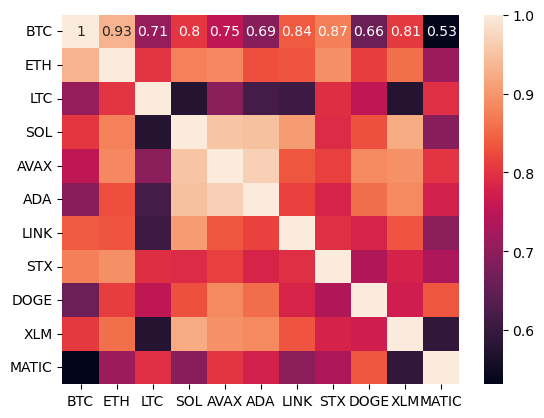

In [16]:
corr = allcoins.corr()
sns.heatmap(corr, annot=True)
plt.show()

/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

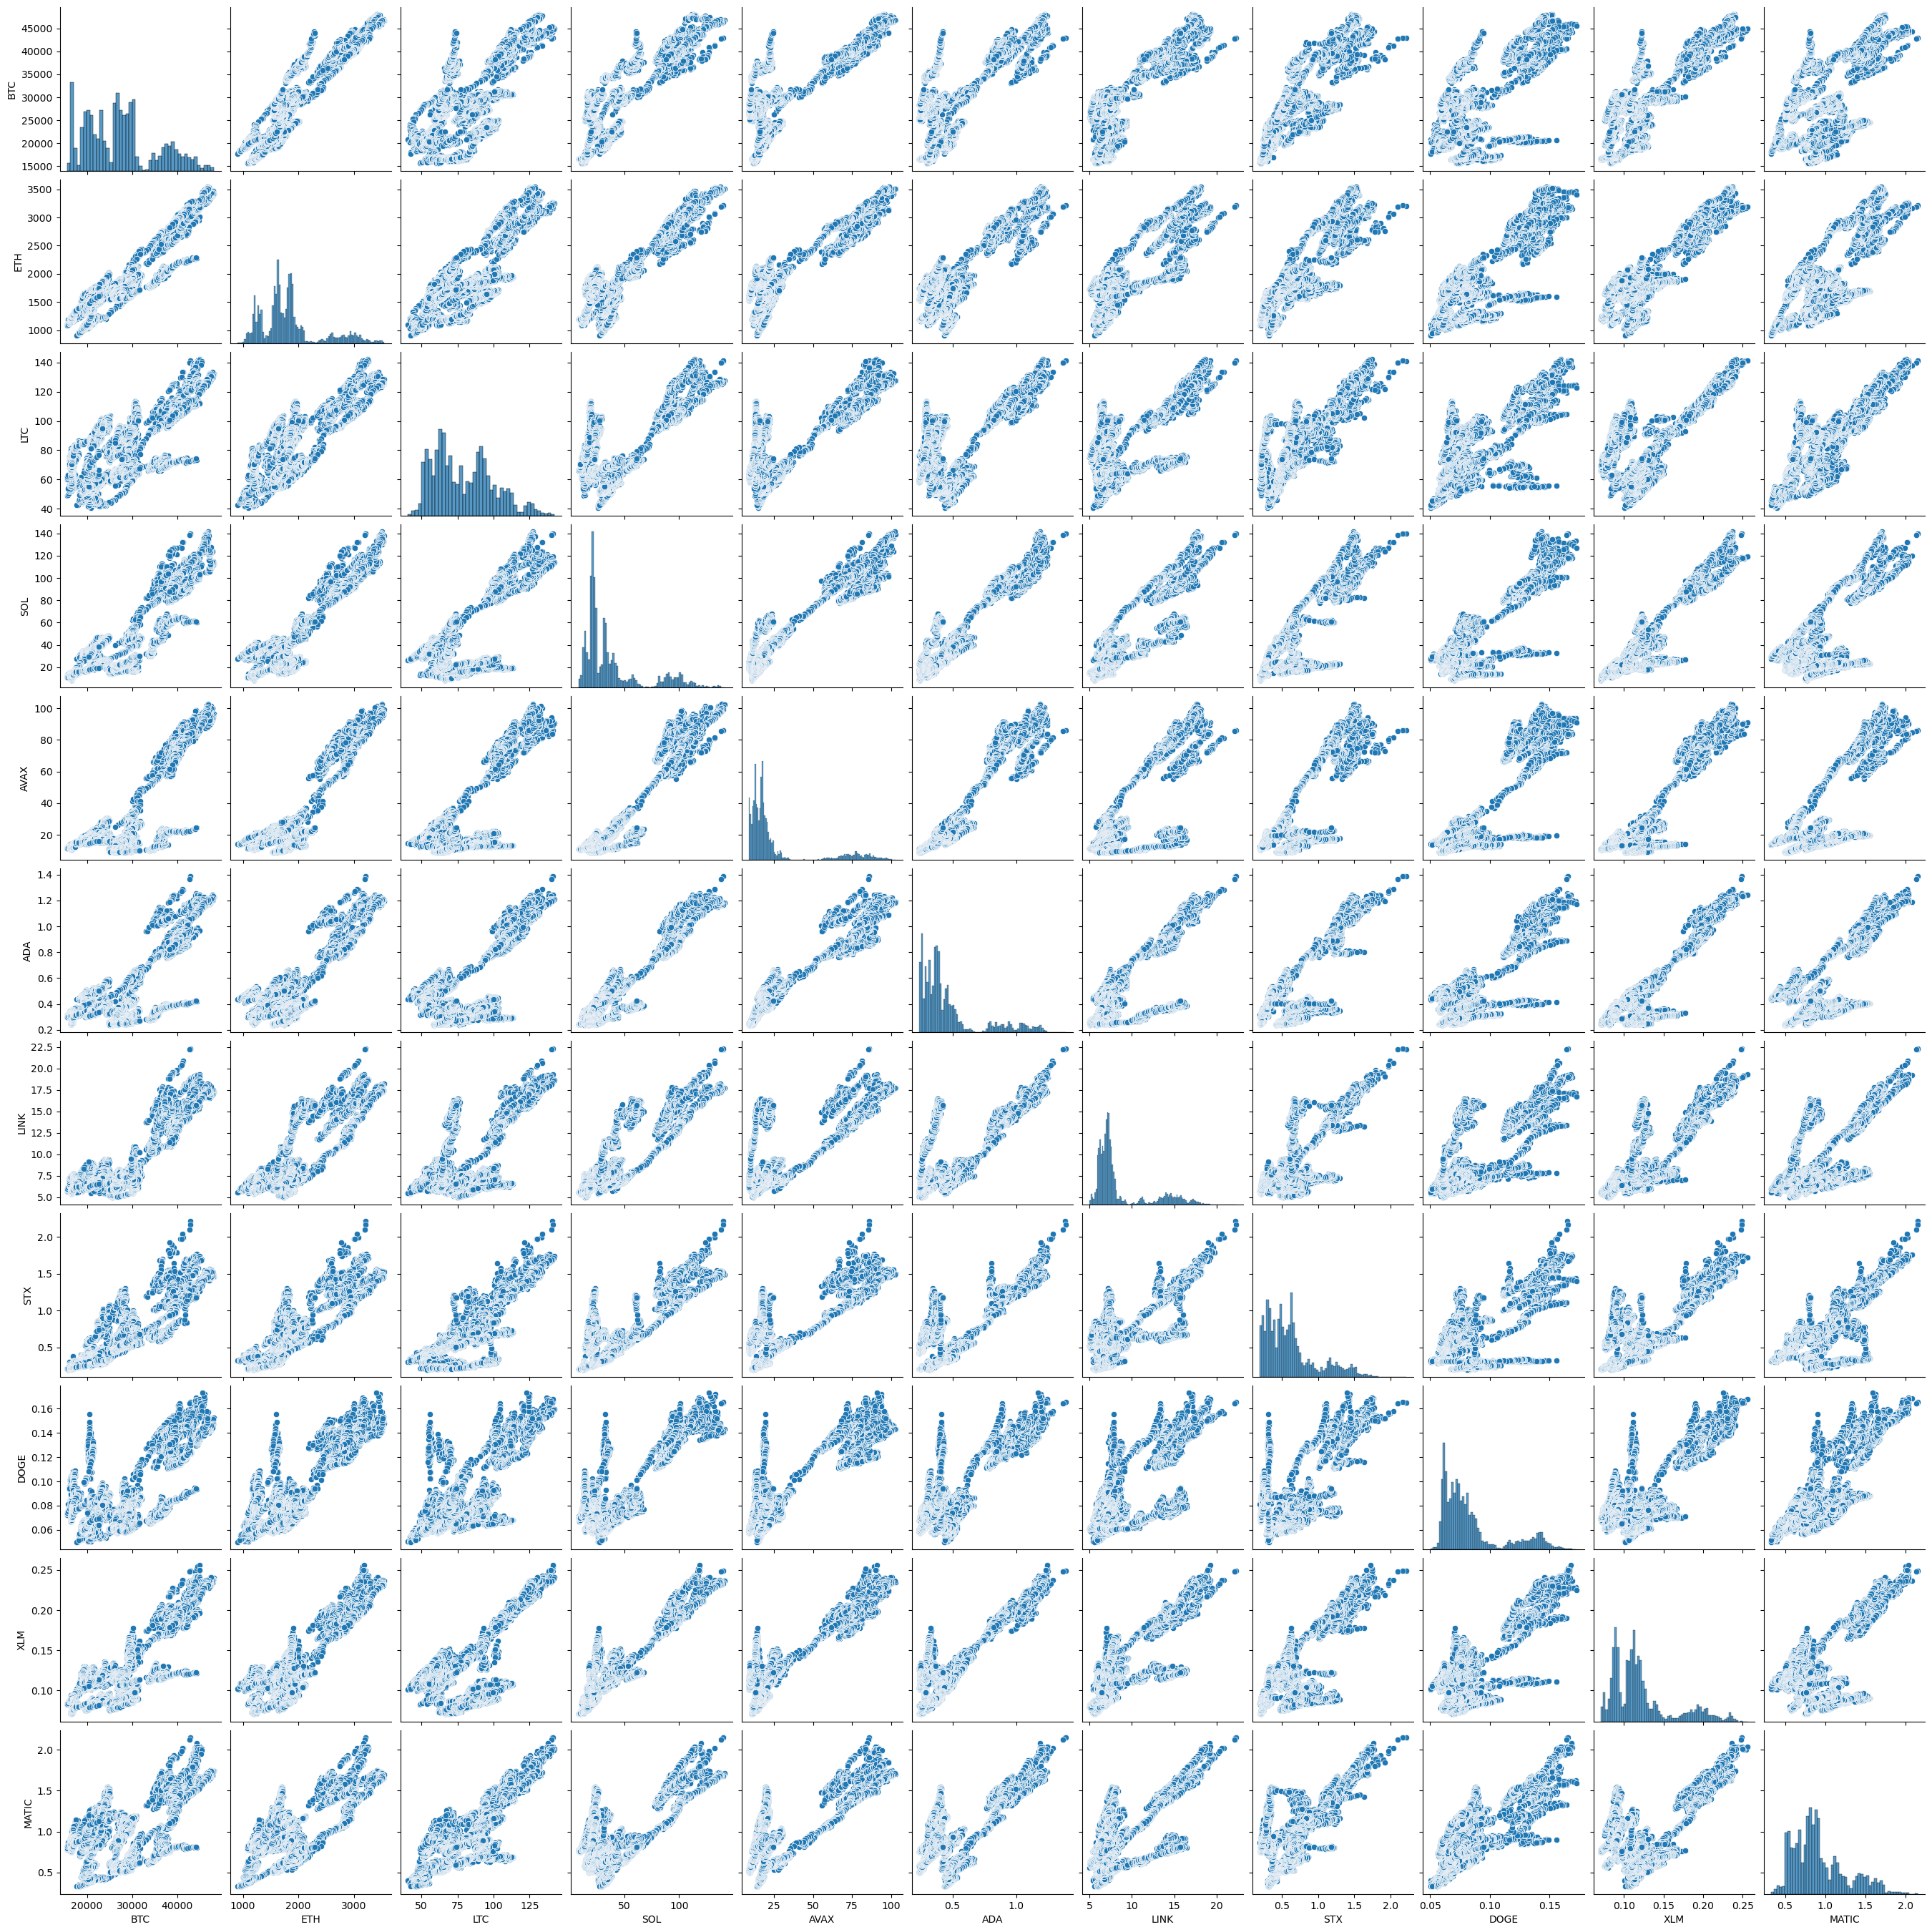

In [17]:
sns.pairplot(allcoins)

/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

<Axes: xlabel='time'>

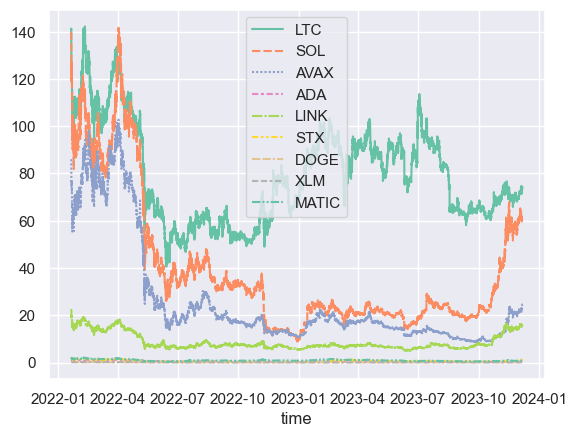

In [21]:
sns.set_theme(style='darkgrid')
sns.lineplot(data=allcoins.drop(['BTC', 'ETH'], axis=1), palette='Set2')

In [24]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(allcoins)
scaled_data

/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a fu

array([[0.8405733 , 0.87255807, 0.98573256, ..., 0.93397457, 0.96147609,
        1.        ],
       [0.84280924, 0.87549103, 0.99065237, ..., 0.93886534, 0.96306526,
        0.99994514],
       [0.83681646, 0.867801  , 0.97874643, ..., 0.92826867, 0.95631939,
        0.98886329],
       ...,
       [0.87315645, 0.51874825, 0.32037784, ..., 0.35229866, 0.27838077,
        0.26355058],
       [0.88572763, 0.52198397, 0.32106661, ..., 0.35490708, 0.27745646,
        0.26234365],
       [0.87879618, 0.52651019, 0.33267736, ..., 0.36061298, 0.27994832,
        0.26722625]])

/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/crypto_rnns/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

<Axes: >

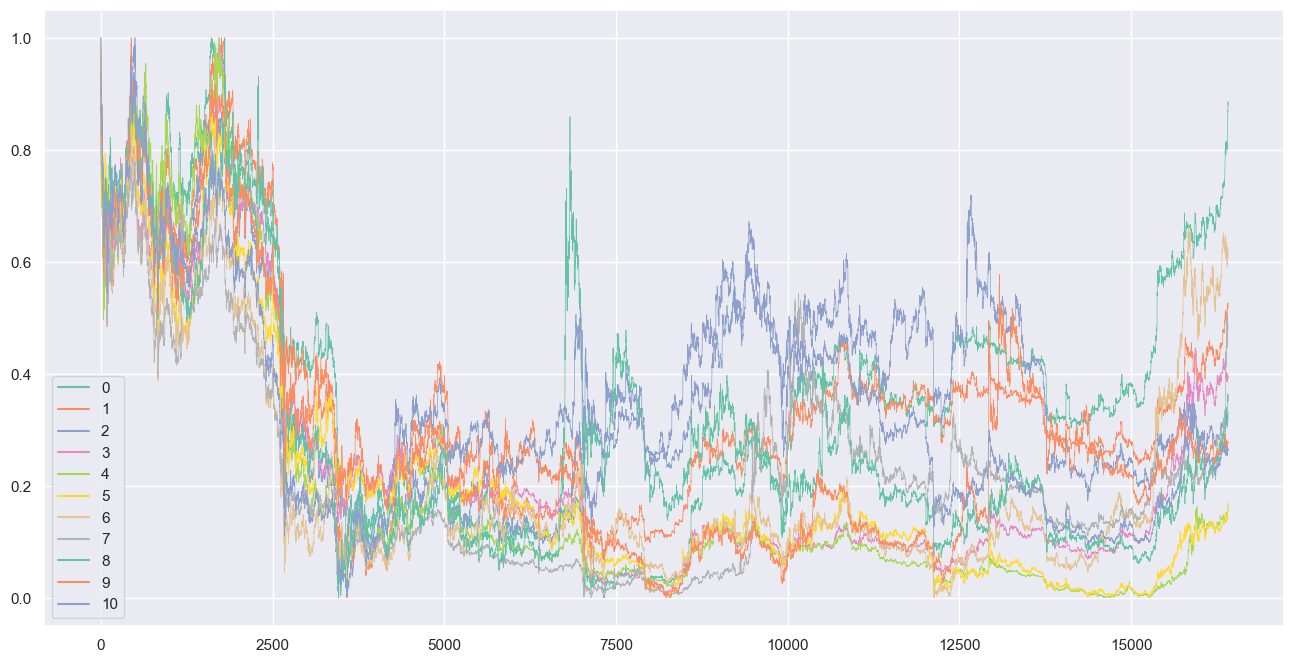

In [27]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=scaled_data, palette='Set2', linewidth=0.5, dashes=False)